In [17]:
import numpy as np
%run ../methodes/k_neighbors_definition.ipynb import K_Neighbors_
import pandas as pd

# On récupère le dataframe d'entraînement stocké en mémoire
%store -r df_train

In [18]:
# Valeurs à tester : nombre de voisins et puissance appliquée à la métrique de Minkowski
n_neighbors = [1, 2, 3,4,5,6,7,8,9,10]
p_ = [1, 2, 3]

In [19]:
# Initialisation des meilleurs paramètres
err_min = 100
k_neighbors_best_n = -2
k_neighbors_best_p = -2

In [20]:
# Initialisation des tableaux pour l'analyse des données
df_n_p_train = pd.DataFrame(0, index = n_neighbors, columns = p_)
df_n_p_test = pd.DataFrame(0, index = n_neighbors, columns = p_)

In [21]:
%%capture --no-display
%run utils.ipynb import K_Fold

for n in n_neighbors:
    for p in p_:
        
        # Validation croisée avec K_Fold
        err_train, err_test = K_Fold(10, df_train, K_Neighbors_(n, p))
            
        # Calcul de l'erreur totale
        err = (err_train + err_test) / 2 

        # On garde les données en mémoire
        df_n_p_train[p][n] = err_train
        df_n_p_test[p][n] = err_test
                
        # On met à jour les meilleurs hyperparamètres
        if err < err_min:
            err_min = err
            k_neighbors_best_n = n
            k_neighbors_best_p = p

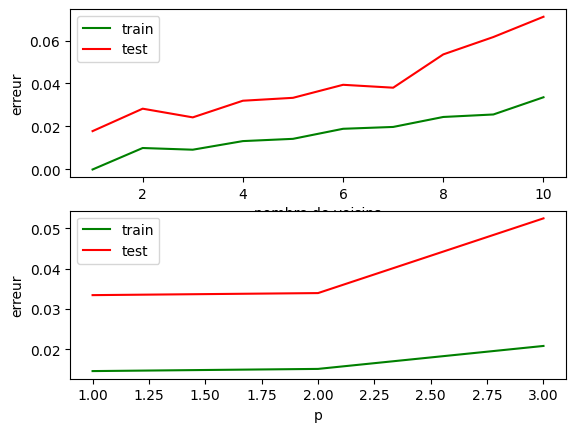

In [22]:
import matplotlib.pyplot as plt
# Représentation graphique

# Evolution de l'erreur moyenne en fonction du nombre de voisins
plt.subplot(2,1,1) 
plot_df(df_n_p_train, df_n_p_test, 'nombre de voisins', 'index', True)

# Evolution de l'erreur moyenne en fonction de p (puissance pour la métrique de minkowski)
plt.subplot(2,1,2)
plot_df(df_n_p_train, df_n_p_test, 'p', 'columns', True)

In [23]:
# On affiche les meilleurs hyperparamètres trouvés
print('err_min : ', err_min, ' | best number of neighbors : ', k_neighbors_best_n, 
      ' | best power for Minkowski : ', k_neighbors_best_p)

err_min :  0.00808080808080808  | best number of neighbors :  1  | best power for Minkowski :  1


In [24]:
# On stocke les meilleurs hyperparamètres trouvés en mémoire
%store k_neighbors_best_n
%store k_neighbors_best_p

Stored 'k_neighbors_best_n' (int)
Stored 'k_neighbors_best_p' (int)


In [27]:
print(df_n_p_test)

           1         2         3
1   0.016162  0.017172  0.020202
2   0.025253  0.024242  0.035354
3   0.021212  0.021212  0.030303
4   0.026263  0.028283  0.041414
5   0.028283  0.025253  0.046465
6   0.030303  0.031313  0.056566
7   0.027273  0.031313  0.055556
8   0.046465  0.044444  0.069697
9   0.050505  0.053535  0.080808
10  0.062626  0.062626  0.087879


In [32]:
print((df_n_p_test/df_n_p_train))

           1         2         3
1        inf       inf       inf
2   2.812500  2.400000  3.247423
3   2.953125  2.392405  2.621359
4   2.108108  2.270270  2.816794
5   2.191304  1.906780  2.797297
6   1.875000  1.788462  2.446602
7   1.687500  1.765823  2.180617
8   2.300000  2.084211  2.194346
9   2.184466  2.433673  2.553191
10  2.137931  2.188235  2.049738
